# Binarization

Binarization is a data transformation that splits them into two groups. The value that splits them is called threshold value.

In [1]:
import numpy as np
from skimage import data
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.exposure import histogram

## Image Thesholding

Consider the image below. We can see at least two categories:

    - cells;
    
    - background;
    
If we want to write a code to quantify some feature of the cells, we eventually have to binarize the image, i.e., split the image into these two groups.

In [2]:
image_path = '../data/mitosis_mod.tif'
image_cells = imread(image_path)

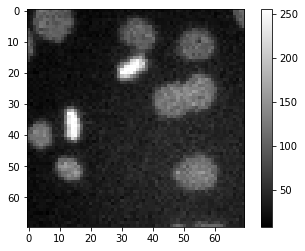

In [3]:
plt.imshow(image_cells, cmap='gray')
plt.colorbar()

We can see the range of pixels by the colorbar or by the code below:

In [4]:
print('max pixel value = ', image_cells.max())
print('min pixel value = ', image_cells.min())

max pixel value =  255
min pixel value =  8


Therefore, we can choose a value in between that can split the image into two groups. Let's try with a value in the middle (125).

Thus, we can binarize the image like this:

In [5]:
image_binary = image_cells > 125

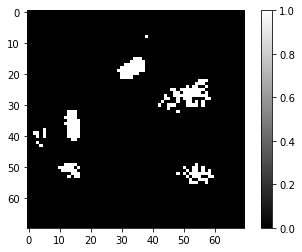

In [6]:
plt.imshow(image_binary, cmap='gray')
plt.colorbar()

Ok maybe 125 was a bad choice... We could at least guess with more insight. The histogram is a useful tool for that.

<BarContainer object of 248 artists>

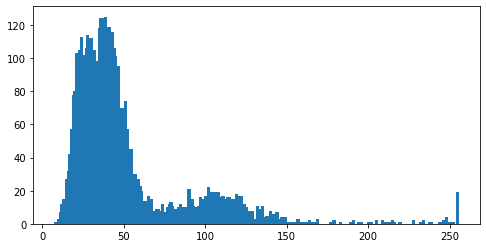

In [7]:
plt.figure(figsize=(8,4)) # Create an empty figure with a specific screen size
piexl_counts, pixel_values = histogram(image_cells) # Calculate the image histogram
plt.bar(pixel_values, piexl_counts, width=2) # Plot the histogram

There is a small 'valley' around the value 60 that seems it would separate two groups. Let's try it.

In [8]:
image_binary = image_cells > 60

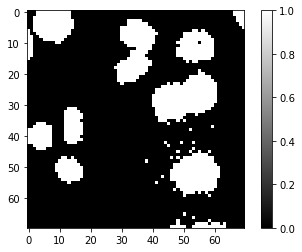

In [9]:
plt.imshow(image_binary, cmap='gray')
plt.colorbar()

Much better!

However, manually setting the threshold may only be interesting while exploring the data, not as part of an image analysis workflow.

A few reasons why:

    - We do not want to choose this every time by hand;
    
    - We would like to avoid introducing bias;
    
    - We would like the workflow to be asily reproducible by others.


Fortunately, there are several very robust methods that automatically calculate the threshold value based the image itself.


One of them was developed by Nobuyuki Otsu in 1979! It is called... [Otsu's method](https://en.wikipedia.org/wiki/Otsu). There is [an implementation of it in scikit-image](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu).

# Exercise 1

Apply Otsu thresholding to the cells image and plot it. What is the obtained threshold value?

In [10]:
from skimage.filters import threshold_otsu